In [ ]:
#Step 1 import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Step 2 : Load dataset
data=load_breast_cancer()
x=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target)


In [ ]:
df=x.copy()
df['target']=y
df.to_csv('breast_cancer.csv', index=False)

In [ ]:
# step 3 Split into train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#step 4: Train Gradient Boosting Classifer
model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Step 5 : Evaluate model
y_pred=model.predict(x_test)
acc=accuracy_score(y_test, y_pred)

print("Accuracy",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassifictioN Report :\n",classification_report(y_test, y_pred))

Accuracy 0.9649122807017544

Confusion Matrix:
 [[40  3]
 [ 1 70]]

ClassifictioN Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



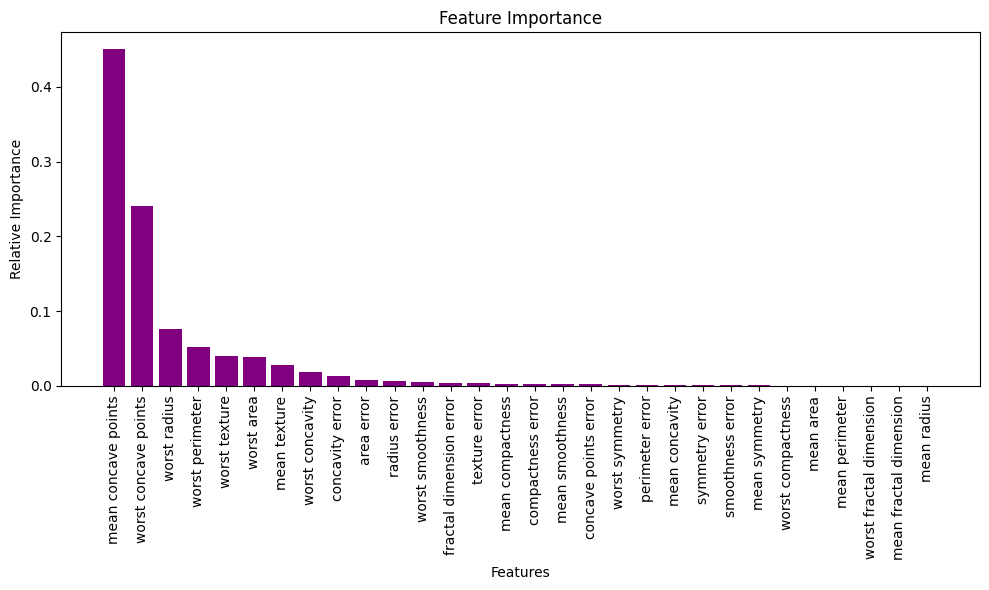

In [ ]:
#step 6 : Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features=x.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], color="purple", align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Relative Importance")
plt.tight_layout()
plt.show()